In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
import random

In [3]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

input shape: (60000, 28, 28)
label shape (10000,)
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7]


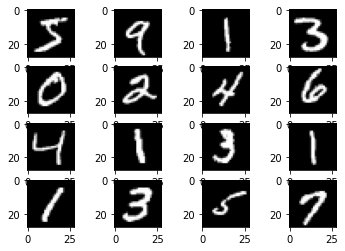

In [5]:
#get an idea of what data looks like
print("input shape:",train_X.shape)
print("label shape",test_y.shape)
print(train_y[:16])
fig,ax=plt.subplots(4,4)
j=0
k=0
for i in range(16):  
    ax[j][k].imshow(train_X[i], cmap=plt.get_cmap('gray'))
    j+=1
    if(j==4): 
        j=0
        k+=1
plt.show()

In [43]:
rand=np.arange(60000)
np.random.shuffle(rand)
train_no=rand[:50000]
val_no=rand[50000:]

X_train,X_val=train_X[train_no,:,:],train_X[val_no,:,:]
Y_train,Y_val=train_y[train_no],train_y[val_no]

In [44]:
#now we need to define our network architecture
#we need to go from 784 nodes to 128 nodes to 10 nodes. Two random matrices, 784x128 and 128x10 for weights and biases
def gen_rand_matrix(a,b):
    mat=np.random.uniform(-1,1,(a,b))*np.sqrt(1/(a*b))
    return mat.astype(np.float32)




In [56]:
#define the functions. relu and softmax?
#Sigmoid funstion
def reLU(x):
    return 1/(np.exp(-x)+1)    

#derivative of sigmoid
def d_reLU(x):
    return (np.exp(-x))/((np.exp(-x)+1)**2)

def softmax(x):
    exp_element=np.exp(x-x.max())
    return exp_element/np.sum(exp_element,axis=0)

#derivative of softmax
def d_softmax(x):
    exp_element=np.exp(x-x.max())
    return exp_element/np.sum(exp_element,axis=0)*(1-exp_element/np.sum(exp_element,axis=0))


In [57]:
loss=[]
lr=0.001
random.seed(42)
lay1=gen_rand_matrix(28*28,128)
lay2=gen_rand_matrix(128,10)
b_lay1=np.zeros(128)
b_lay2=np.zeros(10)
def forward_backward_pass(x,y):
    #first convert y into a functioning output, that means not a digit, but an array of 10 bool elements
    targets = np.zeros((len(y),10), np.float32)
    targets[range(targets.shape[0]),y] = 1
    global lay1,lay2,b_lay1,b_lay2

    #foward pass, put the input into the neural net
    x_ly1=x.dot(lay1)+b_lay1
    x_relu=reLU(x_ly1)
    x_ly2=x_relu.dot(lay2)+b_lay2
    out=softmax(x_ly2)
    
    #error in second layer of weights and biases
    error=2*(out-targets)/out.shape[0]*d_softmax(x_ly2)
    update_l2=x_relu.T@error
    update_b2=np.sum(error, axis=0)
    
    #error in the first layer of weights and biases
    error2=((lay2).dot(error.T)).T*d_reLU(x_ly1)
    update_l1=x.T@error2
    update_b1=np.sum(error2, axis=0)

    #update stuff

    return out,update_l1,update_l2,update_b1,update_b2

In [58]:
epochs=10000
batch=128
lr=0.001
losses,accuracies,val_accuracies=[],[],[]

#we'll try a stochastic gradient descent ... keeping in touch with the old algorithm
for i in range(epochs):
    sample=np.random.randint(0,X_train.shape[0],size=(batch))
    x=X_train[sample].reshape((-1,28*28))
    y=Y_train[sample]
    out,update_l1,update_l2,update_b1,update_b2=forward_backward_pass(x,y)

    category=np.argmax(out,axis=1)
    accuracy=(category==y).mean()
    accuracies.append(accuracy)

    lay1=lay1-lr*update_l1
    lay2=lay2-lr*update_l2
    b_lay1 += update_b1*lr
    b_lay2 += update_b2*lr
    
    loss=((category-y)**2).mean()
    losses.append(loss.item())
    
    if(i%500==0):    
        X_val=X_val.reshape((-1,28*28))
        val_out=np.argmax(softmax(reLU(X_val.dot(lay1)).dot(lay2)),axis=1)
        val_acc=(val_out==Y_val).mean()
        val_accuracies.append(val_acc.item())
        print(f'For {i}th epoch: train accuracy: {accuracy:.3f} | validation accuracy:{val_acc:.3f}')



For 0th epoch: train accuracy: 0.109 | validation accuracy:0.098
For 500th epoch: train accuracy: 0.344 | validation accuracy:0.098
For 1000th epoch: train accuracy: 0.359 | validation accuracy:0.098
For 1500th epoch: train accuracy: 0.352 | validation accuracy:0.098


<ipython-input-56-8678e2b646a2>:13: RuntimeWarning: invalid value encountered in true_divide
  return exp_element/np.sum(exp_element,axis=0)
<ipython-input-56-8678e2b646a2>:18: RuntimeWarning: invalid value encountered in true_divide
  return exp_element/np.sum(exp_element,axis=0)*(1-exp_element/np.sum(exp_element,axis=0))


For 2000th epoch: train accuracy: 0.125 | validation accuracy:0.098
For 2500th epoch: train accuracy: 0.094 | validation accuracy:0.098
For 3000th epoch: train accuracy: 0.094 | validation accuracy:0.098
For 3500th epoch: train accuracy: 0.094 | validation accuracy:0.098
For 4000th epoch: train accuracy: 0.086 | validation accuracy:0.098
For 4500th epoch: train accuracy: 0.047 | validation accuracy:0.098
For 5000th epoch: train accuracy: 0.109 | validation accuracy:0.098
For 5500th epoch: train accuracy: 0.125 | validation accuracy:0.098
For 6000th epoch: train accuracy: 0.109 | validation accuracy:0.098
For 6500th epoch: train accuracy: 0.125 | validation accuracy:0.098
For 7000th epoch: train accuracy: 0.102 | validation accuracy:0.098
For 7500th epoch: train accuracy: 0.102 | validation accuracy:0.098
For 8000th epoch: train accuracy: 0.062 | validation accuracy:0.098
For 8500th epoch: train accuracy: 0.117 | validation accuracy:0.098
For 9000th epoch: train accuracy: 0.070 | valida

In [53]:
test_X=test_X.reshape((-1,28*28))

test_out=np.argmax(softmax(reLU(test_X.dot(lay1)).dot(lay2)),axis=1)
test_acc=(test_out==test_y).mean().item()
print(f'Test accuracy = {test_acc*100:.2f}%')

Test accuracy = 82.88%
